In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score

C:\Users\Joheen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [192]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import data
data = pd.read_csv('rides_data.csv')
data = data.drop(['Base'], 1)
datetimes = data['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data['dayofweek']=dayofweek
data['hour']=hour
df = data.drop(['Date/Time'], 1)
y=df.drop('dayofweek', 1).drop('hour', 1)
x=df.drop('Lat', 1).drop('Lon', 1)
y.head()
print(y.size)

2056272


In [186]:
data1 = pd.read_csv('uber-raw-data-apr14.csv')
data1 = data1.drop(['Base'], 1)
datetimes = data1['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data1['dayofweek']=dayofweek
data1['hour']=hour
df1 = data1.drop(['Date/Time'], 1)
df1.describe()
y1= df1.drop('dayofweek', 1).drop('hour', 1)
x1=df1.drop('Lat', 1).drop('Lon', 1)
y1.head()
print(y1.size)

1129032


In [187]:
data2 = pd.read_csv('uber-raw-data-aug14.csv')
data2 = data2.drop(['Base'], 1)
datetimes = data2['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data2['dayofweek']=dayofweek
data2['hour']=hour
df2 = data2.drop(['Date/Time'], 1)
df2.describe()
y2= df2.drop('dayofweek', 1).drop('hour', 1)
x2=df2.drop('Lat', 1).drop('Lon', 1)
y2.head()
print(y2.size)

1658550


In [188]:
data3 = pd.read_csv('uber-raw-data-jul14.csv')
data3 = data3.drop(['Base'], 1)
datetimes = data3['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data3['dayofweek']=dayofweek
data3['hour']=hour
df3 = data3.drop(['Date/Time'], 1)
df3.describe()
y3= df3.drop('dayofweek', 1).drop('hour', 1)
x3=df3.drop('Lat', 1).drop('Lon', 1)
y3.head()
print(y3.size)

1592242


In [189]:
data4 = pd.read_csv('uber-raw-data-jun14.csv')
data4 = data4.drop(['Base'], 1)
datetimes = data4['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data4['dayofweek']=dayofweek
data4['hour']=hour
df4 = data4.drop(['Date/Time'], 1)
df4.describe()
y4= df4.drop('dayofweek', 1).drop('hour', 1)
x4=df4.drop('Lat', 1).drop('Lon', 1)
y4.head()
print(y4.size)

1327688


In [190]:
data5 = pd.read_csv('uber-raw-data-may14.csv')
data5 = data5.drop(['Base'], 1)
datetimes = data5['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data5['dayofweek']=dayofweek
data5['hour']=hour
df5 = data5.drop(['Date/Time'], 1)
df5.describe()
y5= df5.drop('dayofweek', 1).drop('hour', 1)
x5=df5.drop('Lat', 1).drop('Lon', 1)
y5.head()
print(y5.size)

1304870


In [193]:
xmaster = pd.concat([x,x1,x2,x3, x4, x5])
ymaster = pd.concat([y,y1,y2,y3, y4, y5])
ymaster.shape

(4534327, 2)

In [71]:
# print(xmaster[0:3000000])
xtrain=xmaster[0:3000000]
ytrain=ymaster[0:3000000]
xtest=xmaster[3000000:4000000]
ytest=ymaster[3000000:4000000]
xtest.size

2000000

In [105]:
# print(xmaster[0:3000000])
xtrainmini=xmaster[0:3000]
ytrainmini=ymaster[0:3000]
xtestmini=xmaster[3000:4000]
ytestmini=ymaster[3000:4000]
xtestmini.size

2000

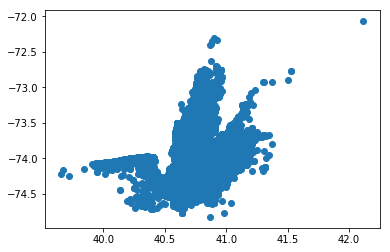

In [72]:
import matplotlib.pyplot as plt
plt.scatter(ytrain[['Lat']], ytrain[['Lon']])
plt.show()

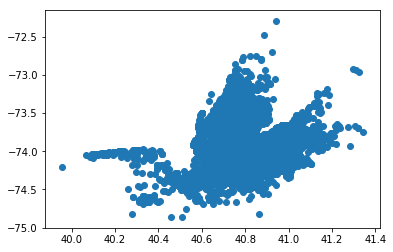

In [73]:
import matplotlib.pyplot as plt
plt.scatter(ytest[['Lat']], ytest[['Lon']])
plt.show()

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
parameters = {'min_samples_leaf': 3,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}
RF_model = DecisionTreeRegressor(**parameters)
RF_model_mini = DecisionTreeRegressor(**parameters)

In [97]:
RF_model.fit(xtrain, ytrain)
RF_model_mini.fit(xtrainmini, ytrainmini)
# RF_predictions = RF_model.predict(xtest)
# score = accuracy_score(ytest ,RF_predictions)
# print(score)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [99]:
RF_predictions = RF_model.predict(xtest)
RF_predictions_mini = RF_model_mini.predict(xtestmini)

In [100]:
print(RF_predictions_mini)

[[ 40.74515393 -73.97631302]
 [ 40.74515393 -73.97631302]
 [ 40.74515393 -73.97631302]
 ...
 [ 40.74515393 -73.97631302]
 [ 40.74515393 -73.97631302]
 [ 40.74515393 -73.97631302]]


In [87]:
from statistics import mean
print(mean(RF_predictions[:,0]))
print(mean(ytest.values[:,0]))

40.73903530529409
40.7399945381


In [118]:
c=0
for y in ytestmini.values[:,0]:
    print(RF_predictions_mini[:,1][c])
    c+=1

-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302211308
-73.97631302

In [126]:
#RANDOM FOREST REGRESSION SCORE: the average of the mean squared error of the latitude and the mean squared error of longitude
std = np.std(ytestmini.values[:,0])
# print(mean(RF_predictions[:,0])/mean(ytestmini.values[:,0]))

sigmalat = 0
c=0
for y in ytestmini.values[:,0]:
    sigmalat += (y-RF_predictions_mini[:,0][c])**2
    c += 1
mselat = (1/ytestmini.size)*(sigmalat)
print(mselat)

sigmalon = 0
c=0
for y in ytestmini.values[:,1]:
    sigmalon += (y-RF_predictions_mini[:,1][c])**2
    c += 1
mselon = (1/ytestmini.size)*(sigmalon)
print(mselon)

0.0008346898726639518
0.002894209966591101


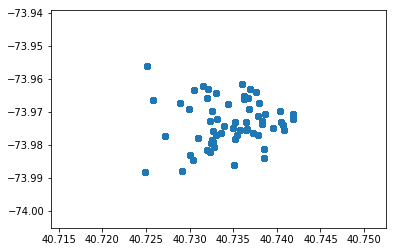

In [50]:
plt.scatter(RF_predictions[:,0], RF_predictions[:,1])
plt.show()

In [128]:
print(ymaster)

            Lat      Lon
0       40.2201 -74.0021
1       40.7500 -74.0027
2       40.7559 -73.9864
3       40.7450 -73.9889
4       40.8145 -73.9444
5       40.6735 -73.9918
6       40.7471 -73.6472
7       40.6613 -74.2691
8       40.3745 -73.9999
9       40.7633 -73.9773
10      40.7467 -73.6131
11      40.8105 -73.9600
12      40.6790 -74.0111
13      40.4023 -73.9839
14      40.7378 -74.0395
15      40.7214 -73.9884
16      40.8646 -73.9081
17      40.7398 -74.0061
18      40.6793 -74.0116
19      40.7328 -73.9875
20      40.6743 -73.9334
21      40.7638 -73.9962
22      40.7638 -73.9811
23      40.7415 -73.9975
24      40.7445 -73.9855
25      40.6614 -73.9409
26      40.7494 -73.9946
27      40.7529 -74.0040
28      41.0319 -74.1813
29      40.7983 -73.9628
...         ...      ...
652405  40.7621 -73.9862
652406  40.8025 -73.9643
652407  40.7108 -73.9361
652408  40.6937 -73.9440
652409  40.7396 -73.9980
652410  40.6449 -73.7822
652411  40.7708 -73.9925
652412  40.7781 -73.9852


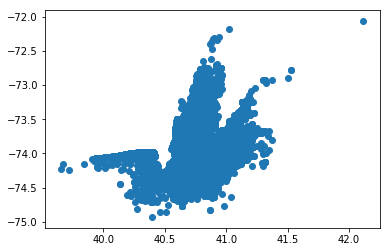

In [129]:
plt.scatter(ymaster[['Lat']], ymaster[['Lon']])
plt.show()

In [133]:
xmaster.head

<bound method NDFrame.head of         dayofweek  hour
0               1     1
1               1     1
2               1     3
3               1     6
4               1    11
5               1    12
6               1    15
7               1    16
8               1    32
9               1    33
10              1    33
11              1    37
12              1    38
13              1    39
14              1    48
15              1    48
16              1    49
17              1    68
18              1    77
19              1    79
20              1    99
21              1   101
22              1   123
23              1   133
24              1   153
25              1   159
26              1   161
27              1   198
28              1   241
29              1   246
...           ...   ...
652405          3  1365
652406          3  1367
652407          3  1371
652408          3  1372
652409          3  1373
652410          3  1374
652411          3  1374
652412          3  1376
652413    

In [204]:
time = 500
day = 4
# xtimes = xmaster.loc[abs(xmaster['hour']-time) <= 10]
# xrel = xtimes.loc[xtimes['dayofweek'] == day] #gets relevant x's

# print(xrel)

ytimes = ymaster.loc[abs(xmaster['hour']-time) <= 10]
yrel = ytimes.loc[xtimes['dayofweek'] == day] #gets relevant x's
print(yrel)
# yrel = pd.DataFrame()
# for i in xrel.index.values:
# #     print(ymaster.iloc[i])
#     yrel.append(ymaster.iloc[i]) #gets relevant y's
# print(yrel)

            Lat      Lon
3286    40.7197 -73.9622
3287    40.7506 -73.9737
3288    40.7330 -73.9923
3289    40.7174 -74.0034
3290    40.7270 -73.9784
3291    40.7112 -74.0056
3292    40.7605 -73.9935
3293    40.7496 -74.0048
3294    40.7386 -73.9918
3295    40.7392 -73.9819
3296    40.7263 -73.9931
3297    40.7065 -73.9379
3298    40.7352 -74.0020
3299    40.7350 -74.0098
3300    40.7612 -73.9695
3301    40.7679 -73.9603
3302    40.7625 -74.0004
3303    40.6789 -73.9702
3304    40.7272 -74.0062
3305    40.7470 -73.9870
3306    40.7757 -73.9472
3307    40.7746 -73.9797
3308    40.7793 -73.9557
3309    40.7832 -73.9491
3310    40.7611 -73.9977
3311    40.7381 -74.0094
3312    40.7748 -73.9503
3313    40.6851 -73.9632
13130   40.7411 -73.9827
13131   40.7746 -73.9592
...         ...      ...
602271  40.6864 -73.7549
602272  40.7828 -73.9477
602273  40.7304 -74.0091
602274  40.7575 -73.9736
602275  40.7519 -73.9855
602276  40.7623 -73.9784
602277  40.7215 -74.0107
602278  40.7234 -73.9958


In [257]:
minlat = (ymaster['Lat'].values.min())
minlon = (ymaster['Lon'].values.min())
maxlat = (ymaster['Lat'].values.max())
maxlon = (ymaster['Lon'].values.max())

uniformgrid = []
latit = minlat
lonit = minlon
uWu = 0
oWo = 0
while lonit <= maxlon:
    while latit<=maxlat:
        zone = []
        zone.append(latit)
        zone.append(lonit)
        latit += .01449 #corresponds to 1 mile, latitude
        zone.append(latit)
        zone.append(lonit+.01455) #corresponds to 1 mile, longitude
        uniformgrid.append(zone)
        uWu+=1
    print(uWu)
    lonit += .01455
    latit=minlat
    uWu = 0
    oWo += 1
print(oWo)
    
len(uniformgrid)

170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
197


33490

In [255]:
print(maxlat)

42.1166


In [264]:
hotspots = np.zeros((170, 197)) #dimensions of uniformgrid
len(hotspots)

170

In [265]:
c = 0
for index, row in yrel.iterrows():
    lat = row['Lat']
    lon = row['Lon']
    latbin = int((lat-minlat)/.01449)
    lonbin = int((lon-minlon)/.01455)
    
    hotspots[latbin][lonbin] += 1
    print(c)
    c+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395


4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394


6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6379
6380
6381
6382
6383
6384
6385
6386
6387
6388
6389
6390
6391
6392
6393


8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392


In [289]:
hotlats = []
hotlons = []

for x in hotspots:
    for y in x:
        if y > hotspots.mean() + 2*hotspots.std():
            print(y)
#             print(str(x.tolist().index(y))+", "+str(hotspots.tolist().index(x.tolist())))
            UwU = uniformgrid[x.tolist().index(y)*170+hotspots.tolist().index(x.tolist())]
            print(str(UwU[0]+.01449/2) + ", " + str(UwU[1]+.01455/2))

27.0
40.64946500000014, -73.78682500000001
23.0
40.64946500000014, -73.77227500000001
39.0
40.66395500000014, -73.990525
25.0
40.66395500000014, -73.975975
44.0
40.678445000000146, -74.005075
48.0
40.678445000000146, -73.990525
85.0
40.678445000000146, -73.975975
67.0
40.678445000000146, -73.961425
27.0
40.678445000000146, -73.946875
35.0
40.69293500000015, -74.179675
130.0
40.69293500000015, -73.990525
75.0
40.69293500000015, -73.975975
72.0
40.69293500000015, -73.961425
31.0
40.69293500000015, -73.946875
56.0
40.70742500000015, -74.019625
155.0
40.70742500000015, -74.005075
61.0
40.70742500000015, -73.990525
83.0
40.70742500000015, -73.961425
55.0
40.70742500000015, -73.946875
21.0
40.70742500000015, -73.917775
41.0
40.72191500000015, -74.019625
500.0
40.72191500000015, -74.005075
605.0
40.72191500000015, -73.990525
256.0
40.72191500000015, -73.975975
92.0
40.72191500000015, -73.961425
103.0
40.72191500000015, -73.946875
586.0
40.736405000000154, -74.005075
672.0
40.736405000000154, 